In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import metapack as mp
import numpy as np
%matplotlib inline 

In [2]:
pkg = mp.jupyter.open_package();
pkg

In [3]:
awards = pkg.resource('awards').read_csv(parse_dates=True)

In [4]:
awards.iloc[100:105].T

,100,101,102,103,104
awardee,"SCIENCE-APPROACH, LLC",UNIVERSITY OF HAWAII SYSTEMS,NaN,RED HILL STUDIOS,TRUSTEES OF CLARK UNIVERSITY
doing_business_as_name,"Science Approach, LLC",University of Hawaii,KCAW-FM Raven Radio,Red Hill Studios,Clark University
pd_pi_name,Steven D Moore,Wayne A Shiroma,Richard Nelson,Robert W Hone,Karen E Frey
pd_pi_phone,(520) 322-0118,(808) 956-7218,(907) 747-5877,(415) 457-0440,(760) 855-5971
pd_pi_email,steven@science-approach.com,wayne.shiroma@hawaii.edu,sitkasound@gmail.com,bobh@redhillstudios.com,kfrey@clarku.edu
co_pd_s_co_pi_s,Allison Whitmer,NaN,NaN,Janis Cannon-Bowers,NaN
award_date,2007-09-26 00:00:00,2007-09-26 00:00:00,2007-09-26 00:00:00,2007-09-26 00:00:00,2007-09-26 00:00:00
estimated_total_award_amount,1.03922e+06,47199,349075,636502,59441
funds_obligated_to_date,1039220,47198,349075,636502,59441
start_date,2008-01-01 00:00:00,2007-09-15 00:00:00,2007-09-15 00:00:00,2007-09-15 00:00:00,2008-01-01 00:00:00


In [5]:
awards.awarding_agency_code.value_counts()

4900.0    136672
Name: awarding_agency_code, dtype: int64

In [6]:
awards.awardee_country.value_counts()

US      136474
USA      18557
BD          67
CA          24
UK          22
FR          22
GM          14
BR           7
SZ           5
AS           4
SW           4
BMU          4
CAN          4
AU           3
NZ           3
UY           3
RQ           3
DA           3
GBR          2
JA           2
BZ           1
GQ           1
1234         1
IS           1
NL           1
IT           1
VE           1
SF           1
FI           1
CM           1
SP           1
IN           1
Name: awardee_country, dtype: int64

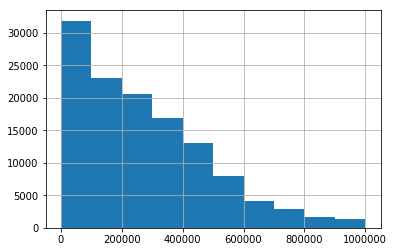

In [11]:

awards.estimated_total_award_amount[awards.estimated_total_award_amount< 1000000].hist()

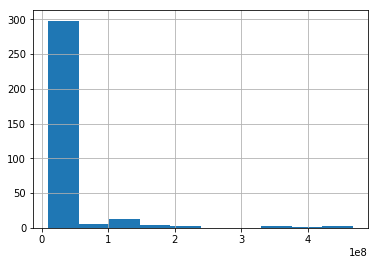

In [14]:
awards.estimated_total_award_amount[awards.estimated_total_award_amount > 10000000].hist()

In [18]:
awards.estimated_total_award_amount.describe()

count    1.306620e+05
mean     4.608051e+05
std      3.262013e+06
min      1.000000e+00
25%      1.051302e+05
50%      2.575050e+05
75%      4.497130e+05
max      4.677999e+08
Name: estimated_total_award_amount, dtype: float64

In [42]:
awards.primary_organization_name.value_counts().head(20)

University of Michigan Ann Arbor              2050
University of Illinois at Urbana-Champaign    1943
University of Washington                      1853
University of California-Berkeley             1633
University of Wisconsin-Madison               1608
University of Texas at Austin                 1572
Georgia Institute of Technology               1528
Massachusetts Institute of Technology         1495
Pennsylvania State Univ University Park       1492
Purdue University                             1485
University of Colorado at Boulder             1480
Arizona State University                      1369
University of Maryland College Park           1367
Stanford University                           1330
Cornell University                            1327
University of Minnesota-Twin Cities           1318
University of California-San Diego            1190
University of Florida                         1188
University of Arizona                         1170
University of California-Los An

In [38]:
year_range = (awards.award_date.dt.year.max() - awards.award_date.dt.year.min())
awards.estimated_total_award_amount.sum() / year_range

5473611100.363636

In [52]:
mudd = awards[awards.primary_organization_name.str.match('Harvey').fillna(False)]
mudd.estimated_total_award_amount.sum()

16699436.0

In [55]:
'\n'.join(list(mudd.abstract_at_time_of_award))

'Mathematical Sciences (21)<br/><br/>This project is improving the teaching and learning of ordinary differential equations (ODEs) by encouraging the wide-spread adoption of modeling projects and computer experiments in ODE courses by: (a) creating a digital library of resources and an online community for ODE instructors to find, share, discuss, and evaluate resources for teaching ODEs; (b) completing the development of a robust, flexible, platform-independent numerical solver that is being freely distributed over the Internet and can carry out computer experiments designed to help students learn about ODEs; and (c) training ODE instructors in the effective use of modeling projects and computer experiments via short courses at mathematics meetings. This project builds on the previous accomplishments of the Consortium of Ordinary Differential Equations Experiments (CODEE).<br/><br/>Intellectual Merit: Because dynamical systems lie at the heart of scientific inquiry, courses in ODEs are

In [56]:
awards.program.value_counts()

SMALL BUSINESS PHASE I            3045
MAJOR RESEARCH INSTRUMENTATION    2605
EAPSI                             2104
RES IN NETWORKING TECH & SYS      1658
ALGEBRA,NUMBER THEORY,AND COM     1571
SOFTWARE & HARDWARE FOUNDATION    1552
ANALYSIS PROGRAM                  1473
ROBUST INTELLIGENCE               1359
ELECT, PHOTONICS, & MAG DEVICE    1275
APPLIED MATHEMATICS               1272
Secure &Trustworthy Cyberspace    1258
COMPUTER SYSTEMS                  1252
INFO INTEGRATION & INFORMATICS    1207
COMPUTATIONAL MATHEMATICS         1120
SMALL BUSINESS PHASE II           1119
I-Corps                           1107
MARINE GEOLOGY AND GEOPHYSICS     1104
ECONOMICS                         1097
S-STEM:SCHLR SCI TECH ENG&MATH    1031
IUSE                              1022
STATISTICS                        1021
BIOLOGICAL OCEANOGRAPHY            983
POP & COMMUNITY ECOL PROG          956
GEOGRAPHY AND SPATIAL SCIENCES     945
GEOPHYSICS                         936
SOCIOLOGY                

In [57]:
awards[awards.program=='STATISTICS'].award_title_or_description

266       Saddlepoint and Bootstrap Methods in Stochasti...
2660      A Theoretical Foundation for Applications of B...
2924      Sufficient Dimension Reduction for Missing, Ce...
2968      Workshop on: Discovery in Complex or Massive D...
2969      Spatial Prediction of Surfaces in the Presence...
3069      MSPA - AST: Sparse Representation and Efficien...
3826      Study of dimension reduction methods driven by...
3847      Theil-Sen Estimators in Semiparametric Mixed M...
3858      Travel Support for the 3rd International Joint...
4428      Synscenelab: A statistical analysis of feasibi...
4474      Theory and algorithms for semi-supervised lear...
4550      Collaborative Research: Applied Probability an...
4574      Collaborative Research: Integral Transform Met...
4582      Collaborative Research: Integral Transform Met...
4600      Collaborative Research: Applied Probability an...
4912      CAREER: Nonparametric likelihood, estimating f...
5193        A NISS/ASA Writing Workshop 

In [69]:
print('\n'.join(list(awards[awards.program.str.contains('Data Infrastructure').fillna(False)].award_title_or_description.sort_values())))

A Method for Leveraging Public Information Sources for Social Science Research
BCC - Building Community and Capacity for Transformative Data-Intensive Criminal Research
BCC - Building an Interdisciplinary Equal Employment Opportunity Research Network and Data Capacity
BCC Building Cyberinfrastructure for Transdisciplinary Research and Visualization of the Long-Term Human Ecodynamics of the North Atlantic
BCC Forecasting the Break: Building Community and Capacity for Large-scale, Data-Intensive Research in Forced Migration Studies
BCC Information-Energy Nexus Research Network
BCC Ohio Longitudinal Data Archive
BCC-EHR: Learning Games Playdata Consortium (PDC): A Consortium for Digital Analytics and Techniques for Assessment with Learning Games
BCC-SBE/EHR: Developing Community & Capacity to Measure Noncognitive Factors in Digital Learning Environments
BCC-SBE: Addressing Challenges for Geospatial Data-Intensive Research Communities: Research on Unique Confidentiality Risks & Geospatial 